In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [2]:
df= pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [4]:
X= df.drop("sales",axis=1)
y=df['sales']

In [5]:
df.shape,X.shape,y.shape

((200, 4), (200, 3), (200,))

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
poly_converter= PolynomialFeatures(degree=2,include_bias=False)
poly_fit = poly_converter.fit(X)
poly_features= poly_fit.transform(X)

In [8]:
poly_features.shape

(200, 9)

In [9]:
X_train,X_test,y_train,y_test=train_test_split(poly_features,y,test_size=0.3,random_state=101)

In [10]:
model = LinearRegression()

In [11]:
model.fit(X_train,y_train)

LinearRegression()

In [12]:
model.score(X_train,y_train), model.score(X_test,y_test)

(0.9868638137712757, 0.9843529333146792)

In [13]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [14]:
predication_value = model.predict(X_test)
predication_value

array([13.94856153, 19.33480262, 12.31928162, 16.76286337,  7.90210901,
        6.94143792, 20.13372693, 17.50092709, 10.56889   , 20.12551788,
        9.44614537, 14.09935417, 12.05513493, 23.39254049, 19.67508393,
        9.15626258, 12.1163732 ,  9.28149557,  8.44604007, 21.65588129,
        7.05070331, 19.35854208, 27.26716369, 24.58689346,  9.03179421,
       11.81070232, 20.42630125,  9.19390639, 12.74795186,  8.64340674,
        8.66294151, 20.20047377, 10.93673817,  6.84639129, 18.27939359,
        9.47659449, 10.34242145,  9.6657038 ,  7.43347915, 11.03561332,
       12.65731013, 10.65459946, 11.20971496,  7.46199023, 11.38224982,
       10.27331262,  6.15573251, 15.50893362, 13.36092889, 22.71839277,
       10.40389682, 13.21622701, 14.23622207, 11.8723677 , 11.68463616,
        5.62217738, 25.03778913,  9.53507734, 17.37926571, 15.7534364 ])

In [15]:
mse= mean_squared_error(y_test,predication_value)
rmse = np.sqrt(mse)
mse, rmse

(np.float64(0.44175055104035066), np.float64(0.6646431757269089))

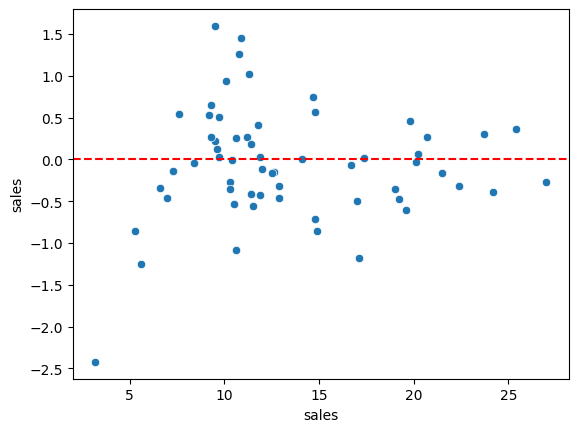

In [21]:
#plotting the residual error
test_residual = y_test-predication_value
sns.scatterplot(x=y_test,y=test_residual)
plt.axhline(y=0,color='red',ls='--')
plt.show()

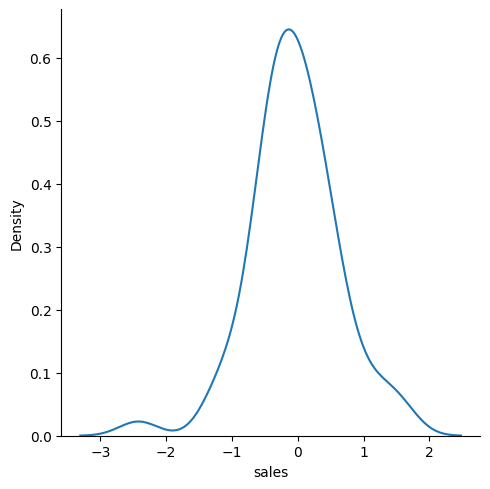

In [22]:
sns.displot(x=test_residual,kind='kde')

In [23]:
final_model= LinearRegression()

In [24]:
final_model

LinearRegression()